In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Stage 1 : Initialization Stage

### Creating dataFrame structure 

In [118]:
iris = datasets.load_iris()
Irisdf = pd.DataFrame(iris.data,columns=iris.feature_names)
Irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [119]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [120]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [121]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [122]:
# Taking only Sepal length and Sepal width for further use

Dataframe = pd.DataFrame({
    'x': iris.data[:,0],
    'y': iris.data[:,1],
    'm': iris.data[:,2],
    'n': iris.data[:,3],
    'cluster' : iris.target
})


In [123]:
Dataframe

,x,y,m,n,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [124]:
Centroids = {}
for i in range(3):
    result_list = []
    result_list.append(Dataframe.loc[Dataframe['cluster'] == i]['x'].mean())
    result_list.append(Dataframe.loc[Dataframe['cluster'] == i]['y'].mean())
    result_list.append(Dataframe.loc[Dataframe['cluster'] == i]['m'].mean())
    result_list.append(Dataframe.loc[Dataframe['cluster'] == i]['n'].mean())
    
    Centroids[i] = result_list

In [125]:
print (Centroids)

{0: [5.005999999999999, 3.428000000000001, 1.4620000000000002, 0.2459999999999999], 1: [5.936, 2.7700000000000005, 4.26, 1.3259999999999998], 2: [6.587999999999998, 2.9739999999999998, 5.552, 2.026]}


### Plotting Points for Sepal 

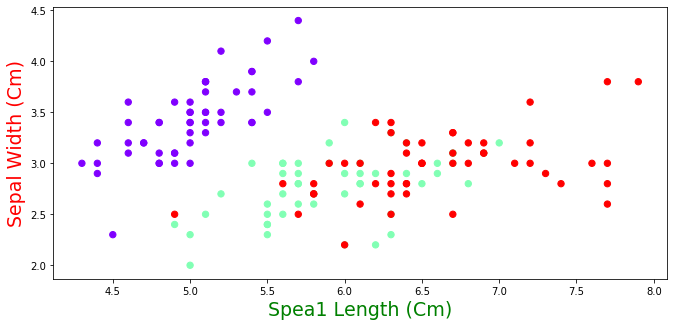

In [115]:
fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['x'], Dataframe['y'], c=iris.target, cmap='rainbow',  s=40 )
plt.xlabel('Spea1 Length (Cm)', fontsize=19, color = 'green')
plt.ylabel('Sepal Width (Cm)', fontsize=19, color = 'red')
plt.show()

# Plotting points for petal

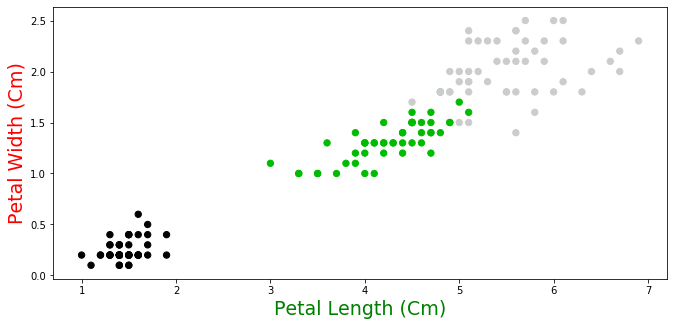

In [128]:
fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['m'], Dataframe['n'], c=iris.target, cmap='nipy_spectral',  s=40 )
plt.xlabel('Petal Length (Cm)', fontsize=19, color = 'green')
plt.ylabel('Petal Width (Cm)', fontsize=19, color = 'red')
plt.show()

### Defining colors and ploting centroids for all clusters with respect to Sepal

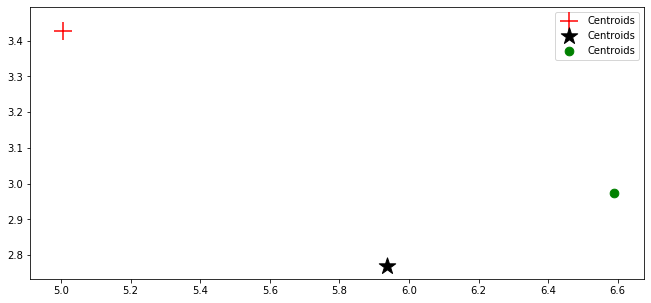

In [130]:
fig = plt.figure(figsize=(11, 5))
colmap = {0: 'red', 1: 'black', 2: 'green'}
markers = {0: '+', 1: '*', 2: '.'}
for i in range(3):
    plt.scatter(Centroids[i][0],Centroids[i][1], color=colmap[i], marker =markers[i], s=300, label= 'Centroids')
plt.legend()

### Defining colors and ploting centroids for all clusters with respect to Petal

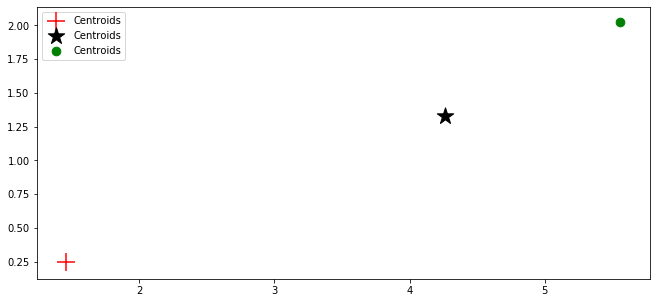

In [131]:
fig = plt.figure(figsize=(11, 5))
colmap = {0: 'red', 1: 'black', 2: 'green'}
markers = {0: '+', 1: '*', 2: '.'}
for i in range(3):
    plt.scatter(Centroids[i][2],Centroids[i][3], color=colmap[i], marker =markers[i], s=300, label= 'Centroids')
plt.legend()

### Showing complete graph for Sepal

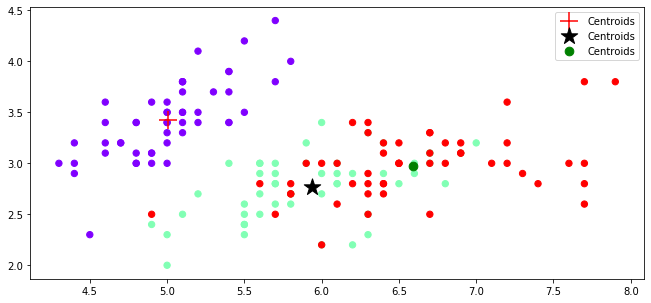

In [132]:
fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['x'], Dataframe['y'], c=iris.target, cmap='rainbow',  s=40 )
for i in range(3):
    plt.scatter(Centroids[i][0],Centroids[i][1], color=colmap[i], marker =markers[i], s=300, label= 'Centroids')
plt.legend()

### Showing complete graph for Petal

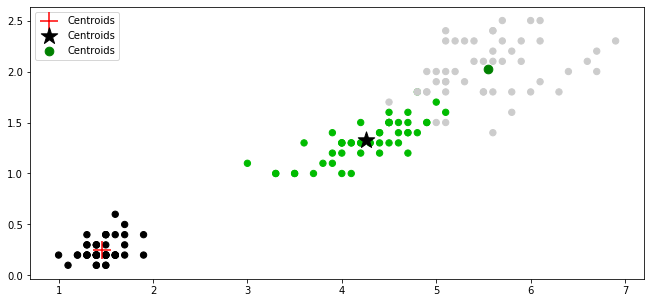

In [133]:
fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['m'], Dataframe['n'], c=iris.target, cmap='nipy_spectral',  s=40 )
for i in range(3):
    plt.scatter(Centroids[i][2],Centroids[i][3], color=colmap[i], marker =markers[i], s=300, label= 'Centroids')
plt.legend()

# Stage 2: Assignment Stage

### Assignment function : Calculating distance and updating dataFrame

In [150]:
def assignment(Dataframe, Centroids):
    for i in range(3):
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        Dataframe['distance_from_{}'.format(i)] = (
            np.sqrt(
                (Dataframe['x'] - Centroids[i][0]) ** 2
                + (Dataframe['y'] - Centroids[i][1]) ** 2
               +(Dataframe['x'] - Centroids[i][0]) ** 2
                + (Dataframe['y'] - Centroids[i][1]) ** 2
               
            )
        )
    Centroid_distance_cols = ['distance_from_{}'.format(i) for i in Centroids.keys()]
    Dataframe['closest'] = Dataframe.loc[:, Centroid_distance_cols].idxmin(axis=1)
    Dataframe['closest'] = Dataframe['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    Dataframe['color'] = Dataframe['closest'].map(lambda x: colmap[x])
    return Dataframe

In [151]:
Dataframe = assignment(Dataframe, Centroids)

In [152]:
Dataframe

,x,y,m,n,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,1.4,0.2,0,0.209221,1.515548,2.483169,0,red
1,4.9,3.0,1.4,0.2,0,0.563346,1.352604,2.691709,0,red
2,4.7,3.2,1.3,0.2,0,0.508420,1.720271,2.978584,0,red
3,4.6,3.1,1.5,0.2,0,0.703898,1.799815,3.114530,0,red
4,5.0,3.6,1.4,0.2,0,0.307148,1.715163,2.656965,0,red
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2.451415,1.336210,0.174055,2,green
146,6.3,2.5,5.0,1.9,2,2.211462,0.750338,1.072907,1,black
147,6.5,3.0,5.2,2.0,2,2.176461,1.072546,0.438134,2,green
148,6.2,3.4,5.4,2.3,2,1.683886,1.143458,0.971834,2,green


### Visualisation of clusters with colors Sepal:

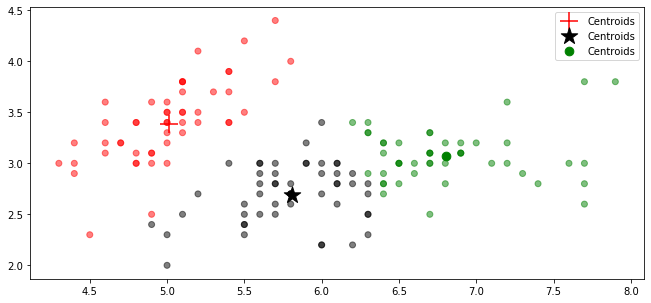

In [153]:
fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['x'], Dataframe['y'], color=Dataframe['color'], alpha = 0.5 )
for i in range(3):
    plt.scatter(Centroids[i][0],Centroids[i][1], color=colmap[i], marker =markers[i], s=300, label= 'Centroids')
plt.legend()

### Visualization of cluster with color for Petal

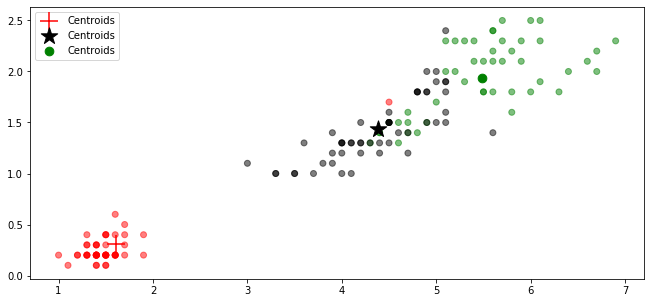

In [155]:
fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['m'], Dataframe['n'], color=Dataframe['color'], alpha=.5 )
for i in range(3):
    plt.scatter(Centroids[i][2],Centroids[i][3], color=colmap[i], marker =markers[i], s=300, label= 'Centroids')
plt.legend()

# Stage 3: Update Stage

### Update function : Updating the centroids

In [156]:
def update(k):
    for i in range(3):
        Centroids[i][0] = np.mean(Dataframe[Dataframe['closest'] == i]['x'])
        Centroids[i][1] = np.mean(Dataframe[Dataframe['closest'] == i]['y'])
        Centroids[i][2] = np.mean(Dataframe[Dataframe['closest'] == i]['m'])
        Centroids[i][3] = np.mean(Dataframe[Dataframe['closest'] == i]['n'])
    return k

In [157]:
Centroids = update(Centroids)
Centroids

{0: [5.003921568627451,
  3.409803921568628,
  1.5215686274509805,
  0.27450980392156854],
 1: [5.790384615384616,
  2.696153846153846,
  4.380769230769231,
  1.4288461538461534],
 2: [6.812765957446806,
  3.0744680851063824,
  5.495744680851062,
  1.9489361702127659]}

### Visualising the graph with updated centroids

# For Sepal

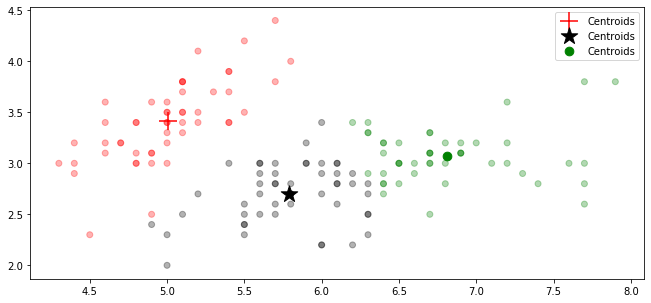

In [159]:
fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['x'], Dataframe['y'], color=Dataframe['color'], alpha = 0.3 )
for i in range(3):
    plt.scatter(Centroids[i][0],Centroids[i][1], color=colmap[i], marker =markers[i], s=300, label= 'Centroids')
plt.legend()

# For Petal

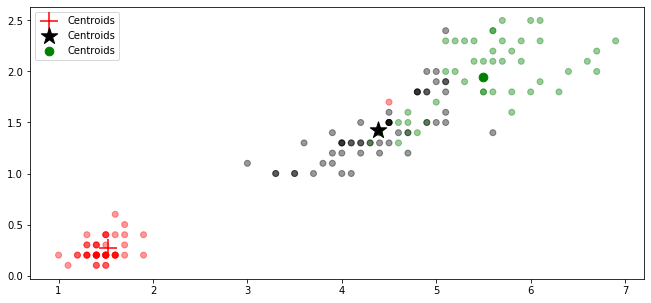

In [160]:
fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['m'], Dataframe['n'], color=Dataframe['color'], alpha=.4 )
for i in range(3):
    plt.scatter(Centroids[i][2],Centroids[i][3], color=colmap[i], marker =markers[i], s=300, label= 'Centroids')
plt.legend()

## Repeat assignment stage to to ressign the points with clusters

In [161]:
Dataframe = assignment(Dataframe, Centroids)

### Visualising the updated graph

#### for Sepal

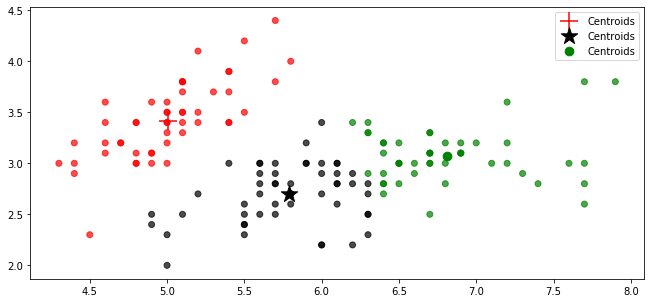

In [162]:
fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['x'], Dataframe['y'], color=Dataframe['color'], alpha = 0.7 )
for i in range(3):
    plt.scatter(Centroids[i][0],Centroids[i][1], color=colmap[i], marker =markers[i], s=300, label= 'Centroids')
plt.legend()

#### for Petal

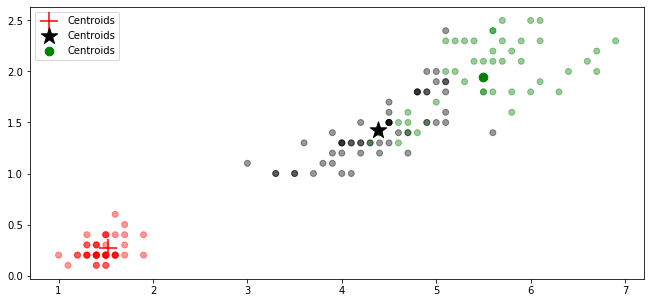

In [163]:
fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['m'], Dataframe['n'], color=Dataframe['color'], alpha=.4 )
for i in range(3):
    plt.scatter(Centroids[i][2],Centroids[i][3], color=colmap[i], marker =markers[i], s=300, label= 'Centroids')
plt.legend()

## Continuing until all assigned clusters don't change any more

In [164]:
while True:
    closest_Centroids = Dataframe['closest'].copy(deep=True)
    Centroids = update(Centroids)
    Dataframe = assignment(Dataframe, Centroids)
    if closest_Centroids.equals(Dataframe['closest']):
        break

# Final Result :
## with respect to Sepal Length and Sepal Width

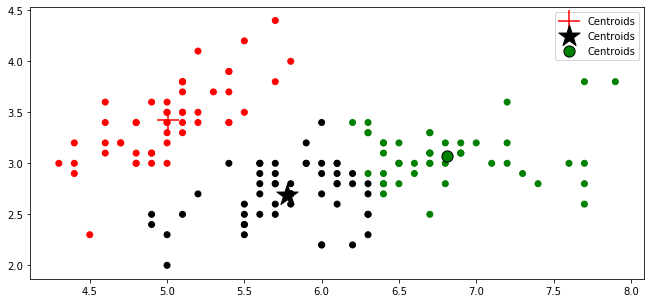

In [166]:
fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['x'], Dataframe['y'], color=Dataframe['color'] )
for i in range(3):
    plt.scatter(Centroids[i][0],Centroids[i][1], color=colmap[i], marker =markers[i], s=500, label= 'Centroids', edgecolor='k' )
plt.legend()

# Final Result :
## with respect to Petal Length and Petal Width

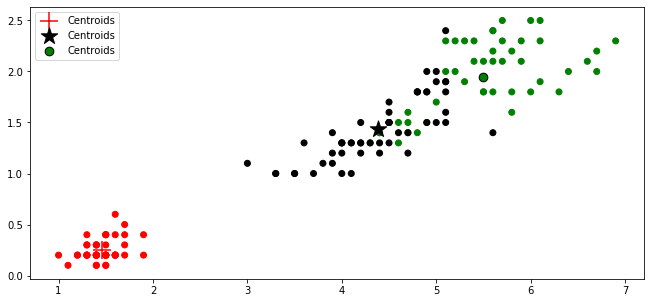

In [167]:
fig = plt.figure(figsize=(11, 5))
plt.scatter(Dataframe['m'], Dataframe['n'], color=Dataframe['color'])
for i in range(3):
    plt.scatter(Centroids[i][2],Centroids[i][3], color=colmap[i], marker =markers[i], s=300, label= 'Centroids', edgecolor='k')
plt.legend()

# Thank You